In [1]:
import os
#import skimage
import torch
from torchvision import transforms
import numpy as np
import glob
from skimage import io
import skimage
import matplotlib.pyplot as plt
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import entropy_mark_transform
from Transforms import hsv_stats_transfrom
from Transforms import lab_stats_transfrom
from Transforms import black_perc_transfrom
import matplotlib.pyplot as plt

DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
d_t=transforms.Compose([phantom_segmentation(False)])

def show_stats(Td,cat="control"):
    print(np.max(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.min(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.mean(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.std(Td[Td[:,2]==cat][:,1].astype('float')))

Sin mascara

In [2]:
#tdatab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Trees_fil='*',Intersec=False)
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False)

In [3]:
t1=black_perc_transfrom()
t2=hsv_stats_transfrom()
t3=lab_stats_transfrom()

In [ ]:
T1={}
T2={}
T3={}

for i in range(len(datab.aID)):
    print(datab.aID[i])
    T1[datab.aID[i]]=t1(datab[i])['bl_per']
    T2[datab.aID[i]]=t2(datab[i])['stat_val']
    T3[datab.aID[i]]=t3(datab[i])['stat_val']

11_junio_1_10_A.JPG
11_junio_1_10_B.JPG
11_junio_1_10_C.JPG
11_junio_1_10_D.JPG
11_junio_1_10_E.JPG
11_junio_1_10_F.JPG
11_junio_1_11_A.JPG
11_junio_1_11_B.JPG
11_junio_1_11_C.JPG
11_junio_1_11_D.JPG
11_junio_1_11_E.JPG
11_junio_1_11_F.JPG
11_junio_1_11_G.JPG
11_junio_1_12_B.JPG
11_junio_1_12_C.JPG
11_junio_1_12_D.JPG
11_junio_1_12_E.JPG
11_junio_1_12_F.JPG
11_junio_1_12_G.JPG
11_junio_1_13_A.JPG
11_junio_1_13_B.JPG
11_junio_1_13_C.JPG
11_junio_1_13_D.JPG
11_junio_1_13_E.JPG
11_junio_1_13_F.JPG
11_junio_1_13_G.JPG
11_junio_1_14_A.JPG
11_junio_1_14_B.JPG
11_junio_1_14_C.JPG
11_junio_1_14_D.JPG
11_junio_1_14_E.JPG
11_junio_1_14_F.JPG
11_junio_1_14_G.JPG
11_junio_1_15_A.JPG
11_junio_1_15_B.JPG
11_junio_1_15_C.JPG
11_junio_1_15_D.JPG
11_junio_1_15_E.JPG
11_junio_1_15_F.JPG
11_junio_1_15_G.JPG
11_junio_1_16_A.JPG
11_junio_1_16_B.JPG
11_junio_1_16_C.JPG
11_junio_1_16_D.JPG
11_junio_1_16_E.JPG
11_junio_1_16_F.JPG
11_junio_1_16_G.JPG
11_junio_1_17_A.JPG
11_junio_1_17_B.JPG
11_junio_1_17_C.JPG


In [ ]:
y=[]
for i in range(len(datab.aID)):
    y.append(datab[i]['landmarks'])

In [23]:
data = list(T1.items())
T1_array = np.array(data)

data = list(T2.items())
T2_array = np.array(data)

data = list(T3.items())
T3_array = np.array(data)

In [ ]:
y=np.array(y)

In [61]:
T1d=np.hstack((T1_array,y))
T2d=np.hstack((T2_array,y))
T3d=np.hstack((T3_array,y))

In [55]:
print(np.unique(y))
def show_stats(Td,cat="control"):
    print(np.max(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.min(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.mean(Td[Td[:,2]==cat][:,1].astype('float')))
    print(np.std(Td[Td[:,2]==cat][:,1].astype('float')))

['Control' 'H50%' 'H75%' 'K_Control' 'K_Deficiencia' 'K_Exceso'
 'N_Control' 'N_Deficiencia' 'N_Exceso' 'P_Control' 'P_Deficiencia'
 'P_Exceso']


In [54]:
show_stats(T1d,"Control")

0.5346445800436694
0.0073283766800041035
0.19202294894014738
0.10778994055158955


In [56]:
#Relacion entre area de valores "oscuros y no oscuros"
show_stats(T1d,"H50%")

0.5141061964325657
0.005953504523827844
0.16316913225549237
0.093404801425512


In [63]:
show_stats(T1d,"H75%")

0.48255543663684436
0.011070764161408638
0.18442093879828783
0.09382164847398097


In [58]:
show_stats(T1d,"N_Control")

0.3863734450784633
0.009136425447434619
0.16125224545945116
0.08592431064479195


In [59]:
show_stats(T1d,"N_Deficiencia")

0.47666567393796605
0.010515205651739563
0.17624827744724747
0.09684472934545352


In [60]:
show_stats(T1d,"N_Exceso")

0.41504684786994517
0.012990076622646203
0.18239051124069078
0.09808026049826186


Con mascara

In [5]:
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False,transform=d_t)

In [6]:
t1=black_perc_transfrom()
t2=hsv_stats_transfrom()
t3=lab_stats_transfrom()

In [ ]:
T1={}
T2={}
T3={}

for i in range(len(datab.aID)):
    print(datab.aID[i])
    T1[datab.aID[i]]=t1(datab[i])['bl_per']
    T2[datab.aID[i]]=t2(datab[i])['stat_val']
    T3[datab.aID[i]]=t3(datab[i])['stat_val']

11_junio_1_10_A
11_junio_1_10_B
11_junio_1_10_C
11_junio_1_10_D
11_junio_1_10_E
11_junio_1_10_F
11_junio_1_11_A
11_junio_1_11_B
11_junio_1_11_C
11_junio_1_11_D
11_junio_1_11_E
11_junio_1_11_F
11_junio_1_11_G
11_junio_1_12_B
11_junio_1_12_C
11_junio_1_12_D
11_junio_1_12_E
11_junio_1_12_F
11_junio_1_12_G
11_junio_1_13_A
11_junio_1_13_B
11_junio_1_13_C
11_junio_1_13_D
11_junio_1_13_E
11_junio_1_13_F
11_junio_1_13_G
11_junio_1_14_A
11_junio_1_14_B
11_junio_1_14_C
11_junio_1_14_D
11_junio_1_14_E
11_junio_1_14_F
11_junio_1_14_G
11_junio_1_15_A
11_junio_1_15_B
11_junio_1_15_C
11_junio_1_15_D
11_junio_1_15_E
11_junio_1_15_F
11_junio_1_15_G
11_junio_1_16_A
11_junio_1_16_B
11_junio_1_16_C
11_junio_1_16_D
11_junio_1_16_E
11_junio_1_16_F
11_junio_1_16_G
11_junio_1_17_A
11_junio_1_17_B
11_junio_1_17_C
11_junio_1_17_D
11_junio_1_17_E
11_junio_1_17_F
11_junio_1_17_G
11_junio_1_18_A
11_junio_1_18_B
11_junio_1_18_C
11_junio_1_18_D
11_junio_1_18_E
11_junio_1_18_F
11_junio_1_18_G
11_junio_1_19_A
11_junio

14_abril_1_5_F
14_abril_1_5_G
14_abril_1_6_A
14_abril_1_6_B
14_abril_1_6_C
14_abril_1_6_D
14_abril_1_6_E
14_abril_1_6_F
14_abril_1_6_G
14_abril_1_7_A
14_abril_1_7_B
14_abril_1_7_C
14_abril_1_7_D
14_abril_1_7_E
14_abril_1_7_F
14_abril_1_7_G
14_abril_1_8_A
14_abril_1_8_B
14_abril_1_8_C
14_abril_1_8_D
14_abril_1_8_E
14_abril_1_8_F
14_abril_1_8_G
14_abril_1_9_A
14_abril_1_9_B
14_abril_1_9_C
14_abril_1_9_D
14_abril_1_9_E
14_abril_1_9_F
14_abril_1_9_G
14_abril_2_10_A
14_abril_2_10_B
14_abril_2_10_C
14_abril_2_10_D
14_abril_2_10_E
14_abril_2_10_F
14_abril_2_11_A
14_abril_2_11_B


In [ ]:
y=[]
for i in range(len(datab.aID)):
    y.append(datab[i]['landmarks'])

In [ ]:
y=np.array(y)

In [15]:
data = list(T1.items())
T1_array = np.array(data)

data = list(T2.items())
T2_array = np.array(data)

data = list(T3.items())
T3_array = np.array(data)
T1d=np.hstack((T1_array,y))
T2d=np.hstack((T2_array,y))
T3d=np.hstack((T3_array,y))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 135 and the array at index 1 has size 2646

In [3]:
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False)

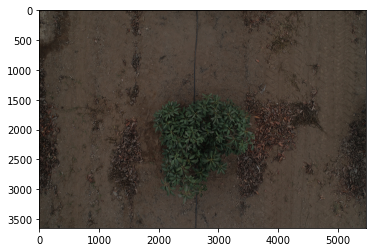

In [11]:
plt.imshow(datab[np.where(datab.aID=='11_junio_1_4_E')]['PhantomRGB'])
#datab[np.where(datab.aID=='11_junio_1_4_E')]['PhantomRGB']

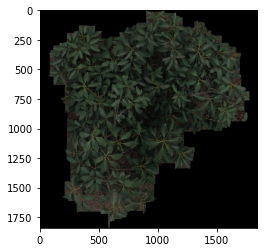

In [4]:
t=phantom_segmentation(False)
plt.imshow(t(datab[np.where(datab.aID=='11_junio_1_4_E')])['PhantomRGB'])
#t(datab[np.where(datab.aID=='11_junio_1_4_E')])

In [16]:
from Transforms.segmentation_methods.segmentation_phantom import seg_mask

In [17]:
mask,x_max,x_min,y_max,y_min=seg_mask(datab[np.where(datab.aID=='11_junio_1_4_E')]['PhantomRGB'])

In [31]:
import numpy as np
import skimage
from skimage import io
from skimage.color import rgb2hsv
from skimage.morphology import binary_closing
import scipy

def seg_mask(img,squared=False):
    hsv_i=rgb2hsv(img)
    h=hsv_i[:,:,0]
    h_b=np.logical_and(h>0.2,h<0.4)
    
    #Erosion and dilation
    disk=skimage.morphology.disk(5)
    hl=np.ones((1,100)).astype('uint8')
    cimg=skimage.morphology.erosion(h_b,disk)
    cimg=binary_closing(cimg,hl)
    cimg=binary_closing(cimg,hl.T)

    limg=skimage.measure.label(cimg)
    props=skimage.measure.regionprops(limg)

    cimg=((limg==np.argmax(np.vectorize(lambda p:p.area)(np.array(props)))+1)).astype("int")

    #Fill
    mask=scipy.ndimage.binary_fill_holes(cimg).astype("int")
    
    x_min=np.min(np.where(mask==1)[0])
    y_min=np.min(np.where(mask==1)[1])
    x_max=np.max(np.where(mask==1)[0])
    y_max=np.max(np.where(mask==1)[1])
    print(x_max)
    #if squared:
    smk=np.zeros(mask.shape)
    Lx=x_max-x_min
    Ly=y_max-y_min
    if Lx<smk.shape[1] and Ly<smk.shape[0]:
        if (Lx)>(Ly):
            print("here")
            d=np.floor((abs((Ly)-(Lx)))/2)
            dL=d
            dR=d+2*((abs((Ly)-(Lx)))/2-d)
            if (y_min-dL)<=0:
                y_max=int(y_max+dR-(y_min-dL))
                y_min=0
            elif (y_max+dR)>=smk.shape[1]:
                y_min=int(y_min-(dL+((y_max+dR)-smk.shape[1])))
                y_max=smk.shape[1]
            else:
                y_min=int(y_min-dL)
                y_max=int(y_max+dR)
        else:
            
            print(x_max)
            d=np.floor((abs((Ly)-(Lx))/2))
            dL=d
            dR=d+2*((abs((Ly)-(Lx)))/2-d)
            if (x_min-dL)<=0:
                print("here")
                print((x_min-dL))
                print(dR-(x_min-dL))
                print(x_max+dR-(x_min-dL))
                x_max=int(round(x_max+dR-(x_min-dL)))
                x_min=0
                print(x_max)
            elif (x_max+dR)>=smk.shape[0]:
                x_min=int(x_min-(dL+((x_max+dR)-smk.shape[0])))
                x_max=smk.shape[0]
                
            else:
                x_min=int(x_min-dL)
                x_max=int(x_max+dR)
    
    if squared:
        smk[x_min:x_max,y_min:y_max]=1
        mask=smk.astype("int")
        
    return mask,x_max,x_min,y_max,y_min

In [32]:
mask,x_max,x_min,y_max,y_min=seg_mask(datab[np.where(datab.aID=='11_junio_1_4_E')]['PhantomRGB'])

3240
here


In [34]:
mask.shape

(3648, 5472)

In [26]:
x_minp=np.min(np.where(mask==1)[0])
y_minp=np.min(np.where(mask==1)[1])
x_maxp=np.max(np.where(mask==1)[0])
y_maxp=np.max(np.where(mask==1)[1])

In [29]:
Lx=x_max-x_min
Ly=y_max-y_min

In [30]:
print(Lx)
print(Ly)

1841
1841


In [36]:
np.floor((abs((Ly)-(Lx)))/2)

300.0

In [11]:
mask.shape

(3648, 5472)

In [55]:
int(368.0+3167)

3535

In [33]:
print(y_max)
print(y_min)

3679
1838


In [28]:
print(y_maxp)
print(y_minp)
print(x_maxp)
print(x_minp)

3605
1911
3240
1399


In [ ]:
y

In [ ]:
print('a')